In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
import matplotlib.pyplot as plt


2024-05-25 13:54:43.376957: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-25 13:54:43.428910: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-25 13:54:44.260733: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Define paths
# data_dir = '/home/vmuser/2024/ACML/ASL'
data_dir = '/home/vmuser/2024/ACML/ASL_bigdata/asl_alphabet_train/asl_alphabet_train'
# train_dir = 'ASL_train'
# test_dir = 'ASL_test'

split_ratio = 0.8  # 80% training, 20% testing

# data augmentation for training data
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=1 - split_ratio  # Use validation split
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),  # Resize images to a specific size (if needed)
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# test data generator without augmentation
test_datagen = ImageDataGenerator(validation_split=1 - split_ratio)

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 69628 images belonging to 29 classes.
Found 17371 images belonging to 29 classes.


Displaying 2 images from class 'A':


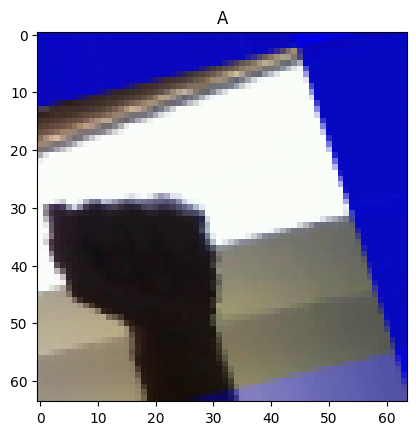

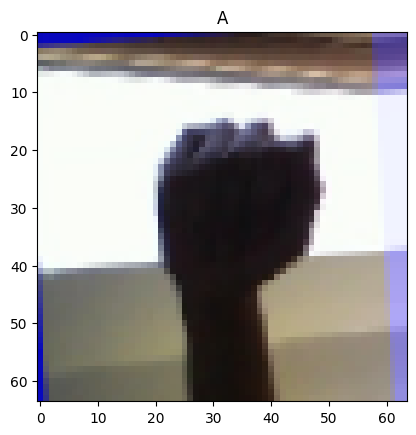

Displaying 2 images from class 'A':


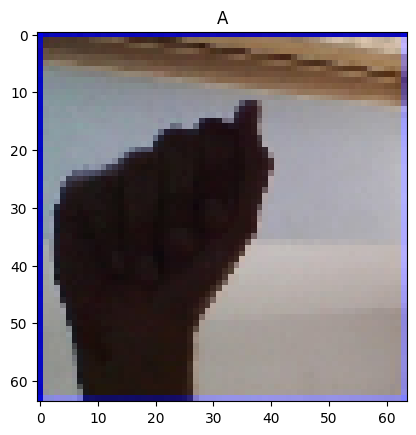

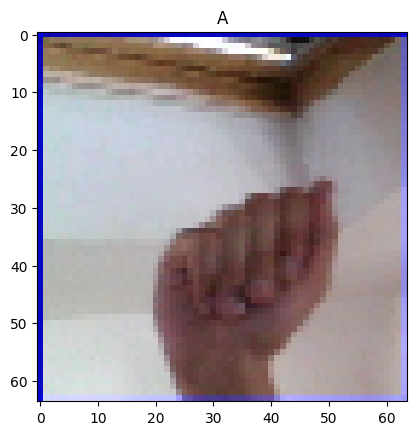

In [3]:
def display_images(generator, class_name, num_images=2):
    class_index = generator.class_indices[class_name]
    class_dir = os.path.join(data_dir, class_name)
    
    images = os.listdir(class_dir)
    
    print(f"Displaying {num_images} images from class '{class_name}':")
    count = 0
    for batch, labels in generator:
        for img, label in zip(batch, labels):
            if label[class_index] == 1:
                plt.imshow(img.astype('uint8'))
                plt.title(f'{class_name}')
                plt.show()
                count += 1
                if count >= num_images:
                    return

display_images(train_generator, 'A')
display_images(test_generator, 'A')

In [4]:
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(29, activation='softmax')
# ])

# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),
    
#     Conv2D(64, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),
    
#     Conv2D(128, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),

#     Conv2D(256, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),

#     Flatten(),
#     Dense(512, activation='relu', kernel_regularizer='l2'),
#     Dropout(0.5),
#     Dense(512, activation='relu', kernel_regularizer='l2'),
#     Dropout(0.5),
#     Dense(29, activation='softmax')
# ])

model = Sequential()
model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(29, activation='softmax'))

/home/vmuser/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-25 13:55:06.581149: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-25 13:55:06.581605: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 61, 61, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 9, 9, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 256)      │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │        14,877 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,234,205 (12.34 MB)

 Trainable params: 3,232,413 (12.33 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [6]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,  # Adjust the number of epochs as needed
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
    ]
)

Epoch 1/10


/home/vmuser/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2176/2176 ━━━━━━━━━━━━━━━━━━━━ 848s 388ms/step - accuracy: 0.1327 - loss: 7.1024 - val_accuracy: 0.1188 - val_loss: 9.2799 - learning_rate: 0.0010
Epoch 2/10
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 814s 374ms/step - accuracy: 0.4544 - loss: 2.7919 - val_accuracy: 0.6670 - val_loss: 1.9364 - learning_rate: 0.0010
Epoch 3/10
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 922s 424ms/step - accuracy: 0.6473 - loss: 2.0604 - val_accuracy: 0.6704 - val_loss: 1.9864 - learning_rate: 0.0010
Epoch 4/10
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 925s 425ms/step - accuracy: 0.7336 - loss: 1.7560 - val_accuracy: 0.4921 - val_loss: 3.8850 - learning_rate: 0.0010
Epoch 5/10
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1015s 466ms/step - accuracy: 0.7787 - loss: 1.5852 - val_accuracy: 0.8183 - val_loss: 1.4101 - learning_rate: 0.0010
Epoch 6/10
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 966s 443ms/step - accuracy: 0.8094 - loss: 1.4613 - val_accuracy: 0.7501 - val_loss: 1.7817 - learning_rate: 0.0010
Epoch 7/10
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1020s 468ms/step - a

543/543 ━━━━━━━━━━━━━━━━━━━━ 36s 66ms/step - accuracy: 0.8695 - loss: 1.2390
Validation Loss: 1.2511498928070068
Validation Accuracy: 0.8685740828514099


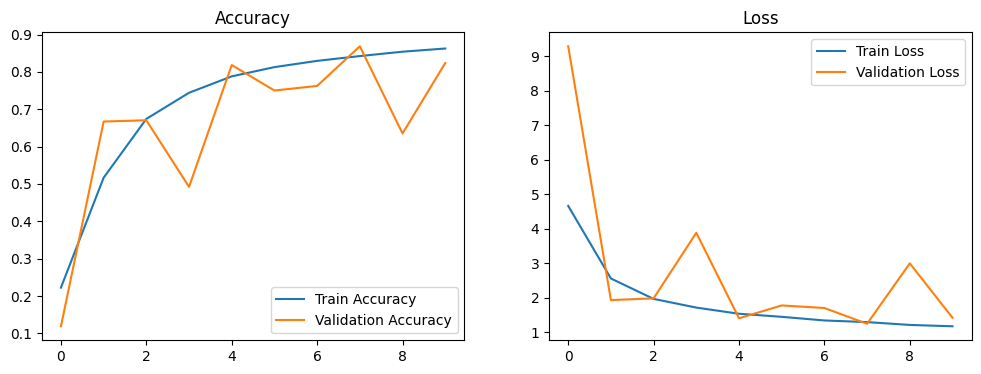

In [7]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(test_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Plotting the accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


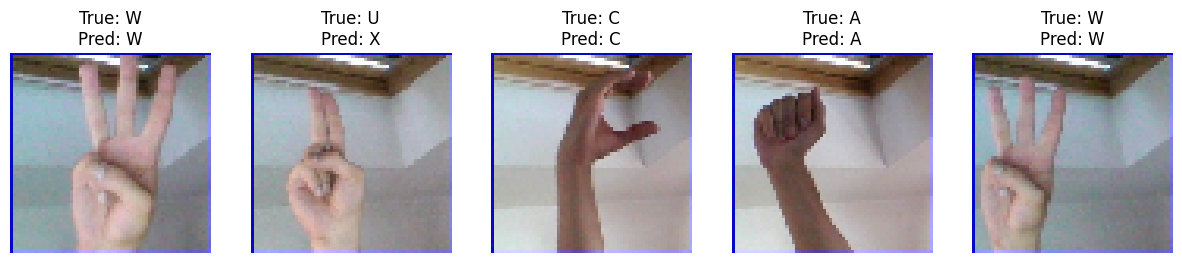

In [8]:
validation_images, validation_labels = next(test_generator)

# Make predictions on the validation images
predictions = model.predict(validation_images)

# Get the class indices
class_indices = {v: k for k, v in test_generator.class_indices.items()}

# Display a few validation images with their predicted labels
num_images_to_display = 5
plt.figure(figsize=(15, 10))

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(validation_images[i].astype('uint8'))
    true_label = class_indices[np.argmax(validation_labels[i])]
    predicted_label = class_indices[np.argmax(predictions[i])]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.show()